In [10]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

In [11]:
# Load the dataset
data = pd.read_csv("CarPrice_Assignment.csv")
print(data.head())
print(data.info())

   car_ID  symboling                   CarName fueltype aspiration doornumber  \
0       1          3        alfa-romero giulia      gas        std        two   
1       2          3       alfa-romero stelvio      gas        std        two   
2       3          1  alfa-romero Quadrifoglio      gas        std        two   
3       4          2               audi 100 ls      gas        std       four   
4       5          2                audi 100ls      gas        std       four   

       carbody drivewheel enginelocation  wheelbase  ...  enginesize  \
0  convertible        rwd          front       88.6  ...         130   
1  convertible        rwd          front       88.6  ...         130   
2    hatchback        rwd          front       94.5  ...         152   
3        sedan        fwd          front       99.8  ...         109   
4        sedan        4wd          front       99.4  ...         136   

   fuelsystem  boreratio  stroke compressionratio horsepower  peakrpm citympg  \

In [12]:
# Data preprocessing
# Dropping unnecessary columns and handling categorical variables
data = data.drop(['CarName', 'car_ID'], axis=1)
data = pd.get_dummies(data, drop_first=True)

In [13]:
# Splitting the data into features and target variable
X = data.drop('price', axis=1)
y = data['price']

In [18]:
scaler = StandardScaler()
# Standardizing the data
#scaler = StandardScaler()
X = scaler.fit_transform(X)
y = scaler.fit_transform(np.array(y).reshape(-1, 1)).flatten()

In [20]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
# Creating the SGD Regressor model
sgd_model = SGDRegressor(max_iter=1000, tol=1e-3)

In [22]:
# Fitting the model on the training data
sgd_model.fit(X_train, y_train)

SGDRegressor()

In [23]:
# Making predictions
y_pred = sgd_model.predict(X_test)

In [24]:
# Evaluating model performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [28]:
# Print evaluation metrics
print("="*50)
print("Mean Squared Error:", mse)
print("R² Score:", r2)

Mean Squared Error: 0.21883299788728874
R² Score: 0.8239489332704082


In [29]:
# Print model coefficients
print("Model Coefficients:")
print("Coefficients:", sgd_model.coef_)
print("Intercept:", sgd_model.intercept_)

Model Coefficients:
Coefficients: [ 0.03617867  0.11220158  0.01340081  0.17989066  0.01727562  0.17999083
  0.2894233  -0.0219111  -0.08354245  0.00054526  0.10704591  0.03705301
 -0.04251091 -0.05128071 -0.01768766  0.02232227  0.01853208 -0.01706791
 -0.08724368 -0.01367051 -0.09428908 -0.03492314  0.0637171   0.21584456
  0.01424732 -0.1035915   0.06860308 -0.01662657  0.00400661  0.00917798
 -0.03605614 -0.14761244 -0.07423654  0.00083127 -0.02428247  0.00917798
 -0.00492445 -0.01427461  0.01768766 -0.01783101 -0.03019558 -0.04085338
 -0.01713143]
Intercept: [-0.01187842]


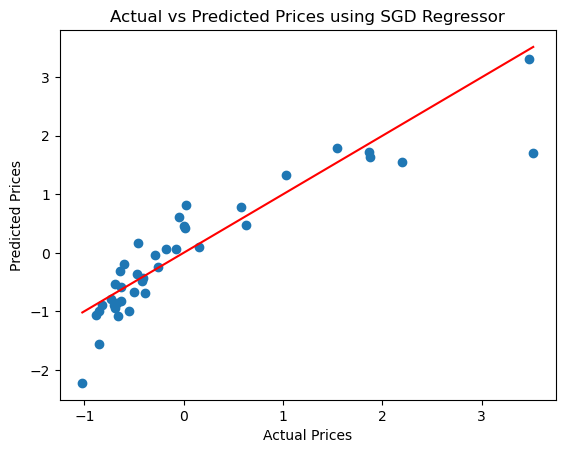

In [27]:
# Visualizing actual vs predicted prices
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices using SGD Regressor")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # Perfect prediction line
plt.show()